In [1]:
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
df = pd.read_table(url)
df.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [48]:
print('the number of rows: {}'.format(df.shape[0]))
print('the number of columns: {}'.format(df.shape[1]))

the number of rows: 4622
the number of columns: 5


In [49]:
features =df.columns
for feature in features:
    print('the number of null values in {} is {}.'.format(feature, df[feature].isnull().sum()))

the number of null values in order_id is 0.
the number of null values in quantity is 0.
the number of null values in item_name is 0.
the number of null values in choice_description is 1246.
the number of null values in item_price is 0.


Which was the most ordered item? and How many items were ordered?

In [50]:
df.item_name.unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

In [51]:
c = df.groupby('item_name').quantity.sum().sort_values(ascending = False)
c

item_name
Chicken Bowl                             761
Chicken Burrito                          591
Chips and Guacamole                      506
Steak Burrito                            386
Canned Soft Drink                        351
Chips                                    230
Steak Bowl                               221
Bottled Water                            211
Chips and Fresh Tomato Salsa             130
Canned Soda                              126
Chicken Salad Bowl                       123
Chicken Soft Tacos                       120
Side of Chips                            110
Veggie Burrito                            97
Barbacoa Burrito                          91
Veggie Bowl                               87
Carnitas Bowl                             71
Barbacoa Bowl                             66
Carnitas Burrito                          60
Steak Soft Tacos                          56
6 Pack Soft Drink                         55
Chips and Tomatillo Red Chili Salsa       50


What was the most ordered item in the choice_description column?

In [52]:
df.groupby('choice_description').order_id.count().sort_values(ascending = False)

choice_description
[Diet Coke]                                                                                                       134
[Coke]                                                                                                            123
[Sprite]                                                                                                           77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                                             42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]                                  40
                                                                                                                 ... 
[Tomatillo Green Chili Salsa, [Fajita Vegetables, Rice, Cheese, Sour Cream, Guacamole]]                             1
[Tomatillo Green Chili Salsa, [Fajita Vegetables, Rice, Cheese, Lettuce]]                                           1
[Tomatillo Green Chili Salsa, [Fajita

In [54]:
df.groupby('choice_description').quantity.count().sort_values(ascending = False)

choice_description
[Diet Coke]                                                                                                       134
[Coke]                                                                                                            123
[Sprite]                                                                                                           77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                                             42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]                                  40
                                                                                                                 ... 
[Tomatillo Green Chili Salsa, [Fajita Vegetables, Rice, Cheese, Sour Cream, Guacamole]]                             1
[Tomatillo Green Chili Salsa, [Fajita Vegetables, Rice, Cheese, Lettuce]]                                           1
[Tomatillo Green Chili Salsa, [Fajita

Turn the item price into a float

In [56]:
df['item_price'] = df['item_price'].str.replace('$','').str.strip('')
df['item_price'] = df['item_price'].astype(float)
df.head(2)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39


How much was the revenue for the period in the dataset?

In [58]:
df['total_price'] = df['item_price']* df['quantity']
df['total_price'].sum()

39237.02

print a data frame with only two columns item_name and item_price

In [65]:
df_small = df[df.quantity == 1][['item_name','item_price']]
df_small.sort_values('item_price', ascending = False)

,item_name,item_price
606,Steak Salad Bowl,11.89
3208,Barbacoa Salad Bowl,11.89
2957,Steak Salad Bowl,11.89
2401,Steak Salad Bowl,11.89
4313,Steak Salad Bowl,11.89
...,...,...
1945,Canned Soda,1.09
2850,Canned Soda,1.09
3683,Canned Soda,1.09
261,Canned Soda,1.09


what was the quantity of the most expensive item ordered?

In [66]:
df[df.item_name == 'Steak Salad Bowl'].quantity.sum()

31

In [67]:
df.sort_values('item_price', ascending = False).head(1)

,order_id,quantity,item_name,choice_description,item_price,total_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25,663.75


How many times were a Veggie Salad Bowl ordered

In [69]:
df[df.item_name == 'Veggie Salad Bowl'].groupby('order_id').sum()

,quantity,item_price,total_price
order_id,,,
83,1,11.25,11.25
128,1,11.25,11.25
195,1,11.25,11.25
207,1,11.25,11.25
394,1,8.75,8.75
536,1,8.75,8.75
760,1,11.25,11.25
869,1,11.25,11.25
896,1,8.75,8.75


drinks data set 

In [2]:
import pandas as pd
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head(2)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe


Which continent drinks more beer on average?

In [5]:
drinks.groupby('continent').beer_servings.mean().sort_values(ascending = False)

continent
Europe           193.777778
South America    175.083333
North America    145.434783
Oceania           89.687500
Africa            61.471698
Asia              37.045455
Name: beer_servings, dtype: float64

For each continent print the statistics for wine consumption.

In [6]:
drinks.groupby('continent').wine_servings.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
Asia,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
Europe,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
North America,23.0,24.521739,28.266378,1.0,5.0,11.0,34.00,100.0
Oceania,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
South America,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


crime data set - resampling

In [5]:
import pandas as pd
crime = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv')
crime.head(2)

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000


Convert the type of the column Year to datetime64

In [6]:
crime['Year'] = pd.to_datetime(crime['Year'], format = '%Y')
crime.dtypes

Year                  datetime64[ns]
Population                     int64
Total                          int64
Violent                        int64
Property                       int64
Murder                         int64
Forcible_Rape                  int64
Robbery                        int64
Aggravated_assault             int64
Burglary                       int64
Larceny_Theft                  int64
Vehicle_Theft                  int64
dtype: object

Set the Year column as the index of the dataframe

In [8]:
crime = crime.set_index('Year', drop = True) 
crime.head()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [9]:
crime.dtypes

Population            int64
Total                 int64
Violent               int64
Property              int64
Murder                int64
Forcible_Rape         int64
Robbery               int64
Aggravated_assault    int64
Burglary              int64
Larceny_Theft         int64
Vehicle_Theft         int64
dtype: object

In [12]:
#Uses resample to sum each decade 
crimes = crime.resample('10AS').sum()
crimes

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,1915053175,49295900,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970-01-01,2121193298,100991600,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980-01-01,2371370069,131123369,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990-01-01,2612825258,136582146,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000-01-01,2947969117,115012044,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010-01-01,1570146307,50167967,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


In [17]:
population = crime['Population'].resample('10AS').max()
population 

Year
1960-01-01    201385000
1970-01-01    220099000
1980-01-01    248239000
1990-01-01    272690813
2000-01-01    307006550
2010-01-01    318857056
Freq: 10AS-JAN, Name: Population, dtype: int64

In [18]:
crimes['Population'] = population
crimes

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,201385000,49295900,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970-01-01,220099000,100991600,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980-01-01,248239000,131123369,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990-01-01,272690813,136582146,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000-01-01,307006550,115012044,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010-01-01,318857056,50167967,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


Select just the 'Murder' and 'Robbery' columns from the original dataset

In [19]:
crime[['Murder','Robbery']].head()

,Murder,Robbery
Year,,
1960-01-01,9110,107840
1961-01-01,8740,106670
1962-01-01,8530,110860
1963-01-01,8640,116470
1964-01-01,9360,130390


Select the data in rows [3, 4, 8] and in columns ['Murder', 'Robbery']

In [21]:
crime.loc[crime.index[[3,4,8]],['Murder','Robbery']]

,Murder,Robbery
Year,,
1963-01-01,8640,116470
1964-01-01,9360,130390
1968-01-01,13800,262840


Select only the rows where the number of murder is greater than 24,000

In [22]:
crime[crime.Murder>24000]

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1991-01-01,252177000,14872900,1911770,12961100,24700,106590,687730,1092740,3157200,8142200,1661700
1993-01-01,257908000,14144800,1926020,12218800,24530,106010,659870,1135610,2834800,7820900,1563100


Select the rows the murder is between 20k and 24k (inclusive)

In [24]:
crime[(crime.Murder>20000) & (crime.Murder<24000)]

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1974-01-01,211392000,10253400,974720,9278700,20710,55400,442400,456210,3039200,5262500,977100
1975-01-01,213124000,11292400,1039710,10252700,20510,56090,470500,492620,3265300,5977700,1009600
1979-01-01,220099000,12249500,1208030,11041500,21460,76390,480700,629480,3327700,6601000,1112800
1980-01-01,225349264,13408300,1344520,12063700,23040,82990,565840,672650,3795200,7136900,1131700
1981-01-01,229146000,13423800,1361820,12061900,22520,82500,592910,663900,3779700,7194400,1087800
1982-01-01,231534000,12974400,1322390,11652000,21010,78770,553130,669480,3447100,7142500,1062400
1986-01-01,240132887,13211869,1489169,11722700,20613,91459,542775,834322,3241410,7257153,1224137
1987-01-01,242282918,13508700,1483999,12024700,20096,91110,517704,855088,3236184,7499900,1288674
1988-01-01,245807000,13923100,1566220,12356900,20680,92490,542970,910090,3218100,7705900,1432900


In [25]:
# or
crime[crime.Murder.between(20000,24000)]

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1974-01-01,211392000,10253400,974720,9278700,20710,55400,442400,456210,3039200,5262500,977100
1975-01-01,213124000,11292400,1039710,10252700,20510,56090,470500,492620,3265300,5977700,1009600
1979-01-01,220099000,12249500,1208030,11041500,21460,76390,480700,629480,3327700,6601000,1112800
1980-01-01,225349264,13408300,1344520,12063700,23040,82990,565840,672650,3795200,7136900,1131700
1981-01-01,229146000,13423800,1361820,12061900,22520,82500,592910,663900,3779700,7194400,1087800
1982-01-01,231534000,12974400,1322390,11652000,21010,78770,553130,669480,3447100,7142500,1062400
1986-01-01,240132887,13211869,1489169,11722700,20613,91459,542775,834322,3241410,7257153,1224137
1987-01-01,242282918,13508700,1483999,12024700,20096,91110,517704,855088,3236184,7499900,1288674
1988-01-01,245807000,13923100,1566220,12356900,20680,92490,542970,910090,3218100,7705900,1432900


Sort df first by the values in the 'Murder' in decending order, #then by the value in the 'Violent' column in ascending order.

sorting by multiple columns 

In [26]:
crime.sort_values(['Murder','Violent'], ascending =[False,True])

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1991-01-01,252177000,14872900,1911770,12961100,24700,106590,687730,1092740,3157200,8142200,1661700
1993-01-01,257908000,14144800,1926020,12218800,24530,106010,659870,1135610,2834800,7820900,1563100
1992-01-01,255082000,14438200,1932270,12505900,23760,109060,672480,1126970,2979900,7915200,1610800
1990-01-01,248709873,14475600,1820130,12655500,23440,102560,639270,1054860,3073900,7945700,1635900
1994-01-01,260341000,13989500,1857670,12131900,23330,102220,618950,1113180,2712800,7879800,1539300
1980-01-01,225349264,13408300,1344520,12063700,23040,82990,565840,672650,3795200,7136900,1131700
1981-01-01,229146000,13423800,1361820,12061900,22520,82500,592910,663900,3779700,7194400,1087800
1995-01-01,262755000,13862700,1798790,12063900,21610,97470,580510,1099210,2593800,7997700,1472400
1989-01-01,248239000,14251400,1646040,12605400,21500,94500,578330,951710,3168200,7872400,1564800


In [1]:
import seaborn as sns

In [2]:
sns.set(style = 'darkgrid')

In [3]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


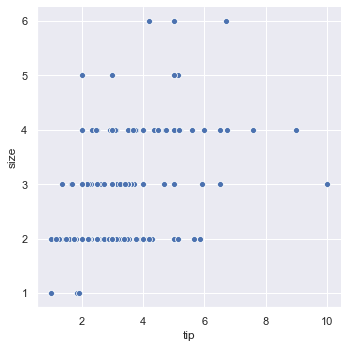

In [5]:
sns.relplot(x = 'tip', y = 'size', data = tips)

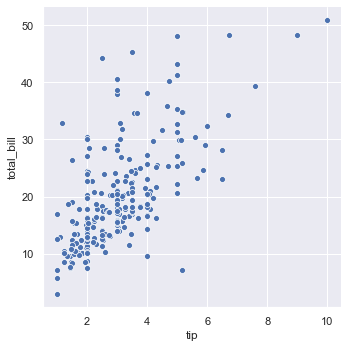

In [6]:
sns.relplot(x = 'tip', y = 'total_bill', data = tips)

In [8]:
tips['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

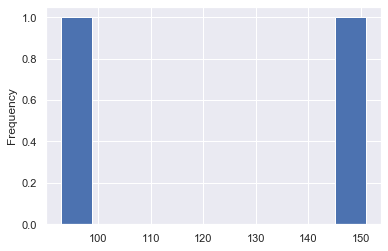

In [10]:
tips['smoker'].value_counts().plot.hist()

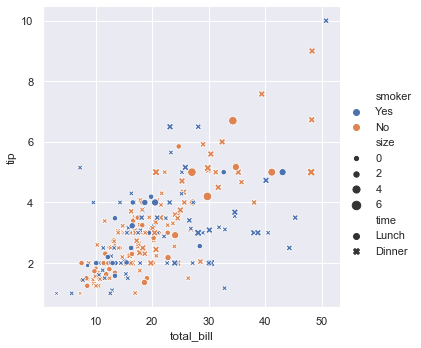

In [12]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker', style = 'time')

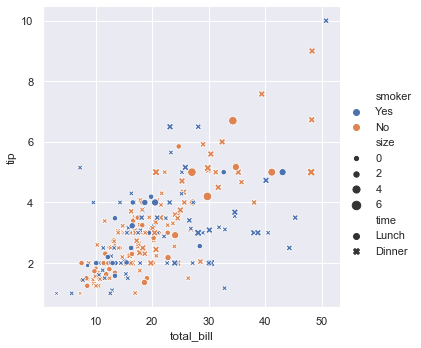

In [13]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker', style = 'time', size = 'size')

,time,value
0,0,1.529467
1,1,1.970734
2,2,2.950321
3,3,1.526847
4,4,-0.132373
